In [72]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
start = -5
scale = 10

input = np.arange(start,start + 18).reshape(2,3,3)
space = np.linspace(-scale, scale, 20*scale + 1)
input

array([[[-5, -4, -3],
        [-2, -1,  0],
        [ 1,  2,  3]],

       [[ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]]])

## ReLU

$$
f(x)=max(0,x)
$$

$$
f'(x)= \begin{cases}
0,x<0\\
1,x>0
  
\end{cases}
$$

In [74]:

def ReLU(x: np.ndarray) -> np.ndarray:
    return np.maximum(0,x)

def dReLU(x: np.ndarray) -> np.ndarray:
    return np.where(x > 0, 1, 0)


In [75]:
print(f'{ReLU(input) = }')
print(f'{dReLU(input) = }')

ReLU(input) = array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 1,  2,  3]],

       [[ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]]])
dReLU(input) = array([[[0, 0, 0],
        [0, 0, 0],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]])


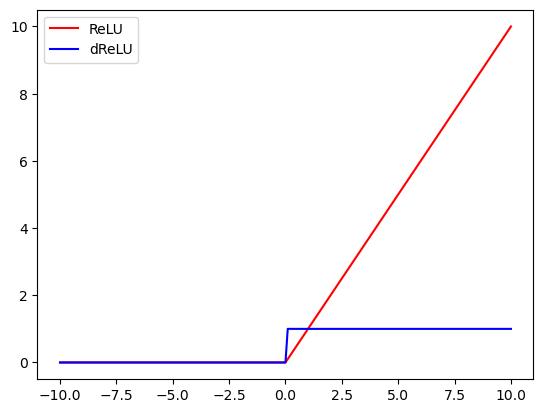

In [76]:
vals = ReLU(space)
dvals = dReLU(space)
plt.plot(space, vals, label='ReLU', color='r')
plt.plot(space, dvals, label='dReLU', color='b')
plt.legend()
plt.show()

## ReLU6

$$
f(x)=min(max(0,x), 6)
$$

$$
f'(x)= \begin{cases}
0,x<0\\
1,0<x<6\\
0,6<x\\

  
\end{cases}
$$

In [77]:
def ReLU6(x: np.ndarray, upper_bound=6) -> np.ndarray:
    return np.minimum(np.maximum(0,x), upper_bound)

def dReLU6(x: np.ndarray, upper_bound=6) -> np.ndarray:
    return np.where(x < 0, 0, np.where(x < upper_bound, 1, 0))


In [78]:
print(f'{ReLU6(input) = }')
print(f'{dReLU6(input) = }')

ReLU6(input) = array([[[0, 0, 0],
        [0, 0, 0],
        [1, 2, 3]],

       [[4, 5, 6],
        [6, 6, 6],
        [6, 6, 6]]])
dReLU6(input) = array([[[0, 0, 0],
        [0, 0, 1],
        [1, 1, 1]],

       [[1, 1, 0],
        [0, 0, 0],
        [0, 0, 0]]])


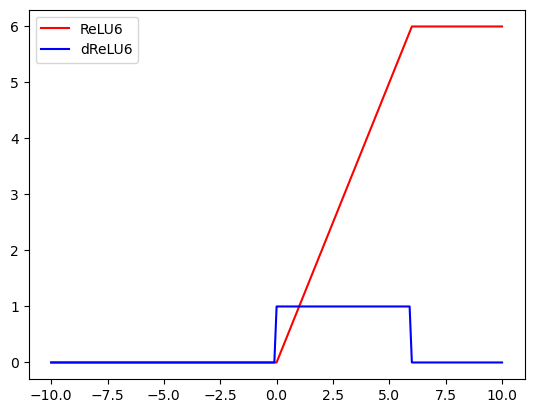

In [79]:
vals = ReLU6(space)
dvals = dReLU6(space)
plt.plot(space, vals, label='ReLU6', color='r')
plt.plot(space, dvals, label='dReLU6', color='b')
plt.legend()
plt.show()

Why 6?

*This is useful in making the networks ready for fixed-point inference. If you unbound the upper limit, you lose too many bits to the Q part of a Q.f number. Keeping the ReLUs bounded by 6 will let them take a max of 3 bits (upto 8) leaving 4/5 bits for .f*

*... First, we cap the units at 6, so our ReLU activation function is y = min(max(x, 0), 6). In our tests, this encourages the model to learn sparse features earlier. In the formulation of [8], this is equivalent to imagining that each ReLU unit consists of only 6 replicated bias-shifted Bernoulli units, rather than an infinute amount. We will refer to ReLU units capped at n as ReLU-n units. \
Since it originates from the paper, I suspect that they tested it with different n's and got the best results for their testset with n=6.*

https://stackoverflow.com/questions/47220595/why-the-6-in-relu6



## ELU

$$
f(x)=\begin{cases}
1,0<x\\
\alpha (e^{x} - 1),x \leq 0
  
\end{cases}
$$

$$
f'(x)= \begin{cases}
1,0<x\\
\alpha e^{x},x<0
  
\end{cases}
$$

In [80]:

def ELU(x: np.ndarray, a=1) -> np.ndarray:
    return np.where(x > 0, x, a*(np.exp(x) - 1))

def dELU(x: np.ndarray, a=1) -> np.ndarray:
    return np.where(x > 0, 1, a*(np.exp(x)))


In [81]:
print(f'{ELU(input) = }')
print(f'{dELU(input) = }')

ELU(input) = array([[[-0.99326205, -0.98168436, -0.95021293],
        [-0.86466472, -0.63212056,  0.        ],
        [ 1.        ,  2.        ,  3.        ]],

       [[ 4.        ,  5.        ,  6.        ],
        [ 7.        ,  8.        ,  9.        ],
        [10.        , 11.        , 12.        ]]])
dELU(input) = array([[[0.00673795, 0.01831564, 0.04978707],
        [0.13533528, 0.36787944, 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]]])


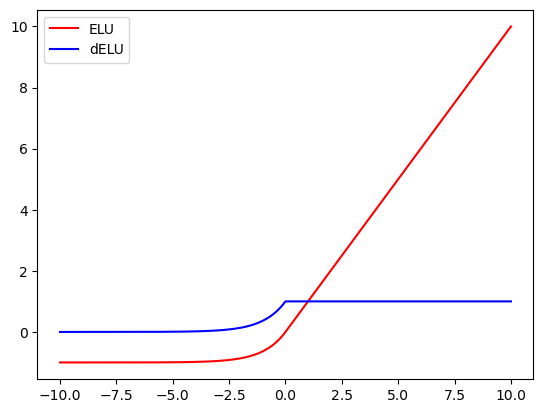

In [82]:
vals = ELU(space)
dvals = dELU(space)
plt.plot(space, vals, label='ELU', color='r')
plt.plot(space, dvals, label='dELU', color='b')
plt.legend()
plt.show()

## SiLU

$$
f(x)=x \sigma (x) = \frac{x}{1+e^{-x}}
$$

$$
f'(x)= \sigma (x) + x\sigma (x)(1 - \sigma (x))
$$

In [83]:
def sigmoid(x: np.array) -> np.array:
    return 1 / (1 + np.exp(-x))

In [84]:

def SiLU(x: np.ndarray) -> np.ndarray:
    return sigmoid(x) * x

def dSiLU(x: np.ndarray) -> np.ndarray:
    return sigmoid(x) + sigmoid(x) * x * (1 - sigmoid(x))


In [85]:
print(f'{SiLU(input) = }')
print(f'{dSiLU(input) = }')

SiLU(input) = array([[[-0.03346425, -0.07194484, -0.14227762],
        [-0.23840584, -0.26894142,  0.        ],
        [ 0.73105858,  1.76159416,  2.85772238]],

       [[ 3.92805516,  4.96653575,  5.98516426],
        [ 6.99362264,  7.9973172 ,  8.99888945],
        [ 9.99954602, 10.99981628, 11.99992627]]])
dSiLU(input) = array([[[-0.02654743, -0.05266461, -0.08810411],
        [-0.09078425,  0.07232949,  0.5       ],
        [ 0.92767051,  1.09078425,  1.08810411]],

       [[ 1.05266461,  1.02654743,  1.01232643],
        [ 1.0054605 ,  1.00234655,  1.00098702],
        [ 1.00040856,  1.00016701,  1.00006759]]])


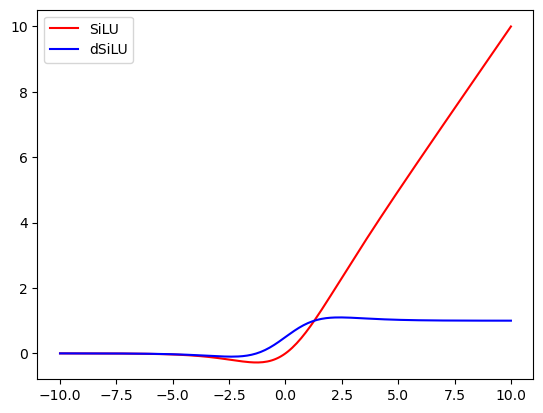

In [86]:
vals = SiLU(space)
dvals = dSiLU(space)
plt.plot(space, vals, label='SiLU', color='r')
plt.plot(space, dvals, label='dSiLU', color='b')
plt.legend()
plt.show()

## Softplus

$$
f(x)=ln(1+e^x)
$$

$$
f'(x)= \sigma (x)
$$

In [87]:

def Softplus(x: np.ndarray) -> np.ndarray:
    return np.log(1 + np.exp(x))

def dSoftplus(x: np.ndarray) -> np.ndarray:
    return sigmoid(x)


In [88]:
print(f'{Softplus(input) = }')
print(f'{dSoftplus(input) = }')

Softplus(input) = array([[[6.71534849e-03, 1.81499279e-02, 4.85873516e-02],
        [1.26928011e-01, 3.13261688e-01, 6.93147181e-01],
        [1.31326169e+00, 2.12692801e+00, 3.04858735e+00]],

       [[4.01814993e+00, 5.00671535e+00, 6.00247569e+00],
        [7.00091147e+00, 8.00033541e+00, 9.00012340e+00],
        [1.00000454e+01, 1.10000167e+01, 1.20000061e+01]]])
dSoftplus(input) = array([[[0.00669285, 0.01798621, 0.04742587],
        [0.11920292, 0.26894142, 0.5       ],
        [0.73105858, 0.88079708, 0.95257413]],

       [[0.98201379, 0.99330715, 0.99752738],
        [0.99908895, 0.99966465, 0.99987661],
        [0.9999546 , 0.9999833 , 0.99999386]]])


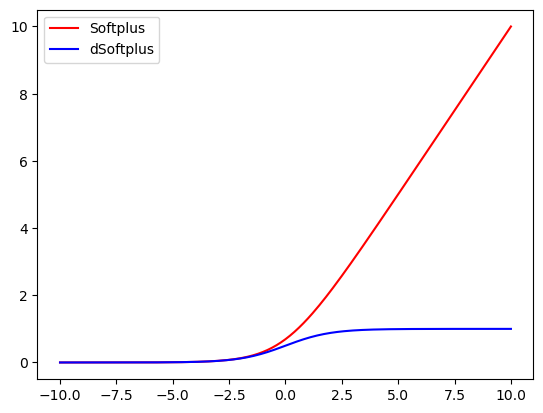

In [89]:
vals = Softplus(space)
dvals = dSoftplus(space)
plt.plot(space, vals, label='Softplus', color='r')
plt.plot(space, dvals, label='dSoftplus', color='b')
plt.legend()
plt.show()

## Swish

$$
f(x)=x \cdot \sigma (\beta x)
$$

$$
f'(x)= \sigma (\beta x) + x \beta \sigma (\beta x)(1 - \sigma (\beta x))
$$

// *generalization of SiLU*

*However, the simplicity and efficiency of ReLU remained unchallenged throughout, until Swish Activation Function was released which showcased strong and improved results on many challenging benchmarks*

Swish was a breakthrough!

In [90]:

def Swish(x: np.ndarray, b=1) -> np.ndarray:
    return x / (1 + np.exp(-b*x))

def dSwish(x: np.ndarray, b=1) -> np.ndarray:
    return (sigmoid(b*x) + x*b*sigmoid(b*x)*(1 - sigmoid(b*x)))


In [91]:
print(f'{Swish(input) = }')
print(f'{dSwish(input) = }')

Swish(input) = array([[[-0.03346425, -0.07194484, -0.14227762],
        [-0.23840584, -0.26894142,  0.        ],
        [ 0.73105858,  1.76159416,  2.85772238]],

       [[ 3.92805516,  4.96653575,  5.98516426],
        [ 6.99362264,  7.9973172 ,  8.99888945],
        [ 9.99954602, 10.99981628, 11.99992627]]])
dSwish(input) = array([[[-0.02654743, -0.05266461, -0.08810411],
        [-0.09078425,  0.07232949,  0.5       ],
        [ 0.92767051,  1.09078425,  1.08810411]],

       [[ 1.05266461,  1.02654743,  1.01232643],
        [ 1.0054605 ,  1.00234655,  1.00098702],
        [ 1.00040856,  1.00016701,  1.00006759]]])


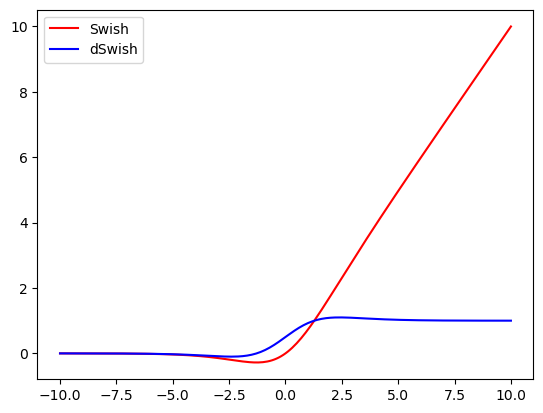

In [92]:
vals = Swish(space)
dvals = dSwish(space)
plt.plot(space, vals, label='Swish', color='r')
plt.plot(space, dvals, label='dSwish', color='b')
plt.legend()
plt.show()

## Mish

$$
f(x)=x \cdot tanh(x) \cdot softplus(x)
$$

$$
f'(x)= \frac{e^x(4(x+1)+4e^{2x}+e^{3x}+e^{x}(4x+6))}{(2e^{2x}+e^{2x}+2)^2}
$$

In [93]:

def Mish(x: np.ndarray) -> np.ndarray:
    return x * np.tanh(x) * Softplus(x)

def dMish(x: np.ndarray) -> np.ndarray:
    return (np.exp(x)*(4*(x + 1) + 4*np.exp(2*x) + np.exp(3*x) + np.exp(x)*(4*x + 6)))/((2*np.exp(x) + np.exp(2*x) + 2)**2)


In [94]:
print(f'{Mish(input) = }')
print(f'{dMish(input) = }')

Mish(input) = array([[[3.35736938e-02, 7.25510190e-02, 1.45041225e-01],
        [2.44724207e-01, 2.38578270e-01, 0.00000000e+00],
        [1.00017243e+00, 4.10083453e+00, 9.10053401e+00]],

       [[1.60618198e+01, 2.50313038e+01, 3.60144115e+01],
        [4.90062988e+01, 6.40026688e+01, 8.10011082e+01],
        [1.00000454e+02, 1.21000184e+02, 1.44000074e+02]]])
dMish(input) = array([[[-0.0267475 , -0.05377321, -0.09339311],
        [-0.10835509,  0.05921676,  0.6       ],
        [ 1.04903622,  1.06931793,  1.02110691]],

       [[ 1.00443288,  1.00080022,  1.00013414],
        [ 1.00002156,  1.00000337,  1.00000052],
        [ 1.00000008,  1.00000001,  1.        ]]])


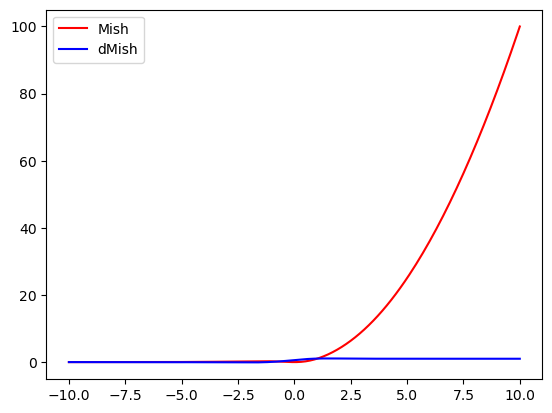

In [95]:
vals = Mish(space)
dvals = dMish(space)
plt.plot(space, vals, label='Mish', color='r')
plt.plot(space, dvals, label='dMish', color='b')
plt.legend()
plt.show()

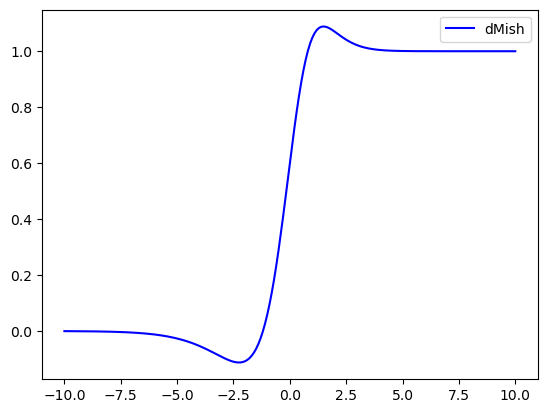

In [101]:
plt.plot(space, dvals, label='dMish', color='b')
plt.legend()
plt.show()

Mish takes inspiration from Swish by using a property called Self Gating, where the scalar input is provided to the gate. The property of Self-gating is advantageous for replacing activation functions like ReLU (point-wise functions)
which take in a single scalar input without requiring to change the network parameters.

$[-0.31; +\infty)$

Mish paper: https://arxiv.org/vc/arxiv/papers/1908/1908.08681v1.pdf \
Mish: A Self Regularized Non-Monotonic Neural Activation Function

## GeLU

$$
f(x)=x \cdot \Phi (x)
$$

$$
f'(x)=x \Phi ' (x) + \Phi (x)
$$

$\Phi$ -- Gaussian cumulative distribution function

In [104]:
from scipy.stats import norm

def GELU(x: np.ndarray) -> np.ndarray:
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))

def dGELU(x: np.ndarray) -> np.ndarray:
    return norm.cdf(x) + x*norm.pdf(x)


In [105]:
print(f'{GELU(input) = }')
print(f'{dGELU(input) = }')

GELU(input) = array([[[-2.29179620e-07, -7.02459482e-05, -3.63739208e-03],
        [-4.54023059e-02, -1.58808009e-01,  0.00000000e+00],
        [ 8.41191991e-01,  1.95459769e+00,  2.99636261e+00]],

       [[ 3.99992975e+00,  4.99999977e+00,  6.00000000e+00],
        [ 7.00000000e+00,  8.00000000e+00,  9.00000000e+00],
        [ 1.00000000e+01,  1.10000000e+01,  1.20000000e+01]]])
dGELU(input) = array([[[-7.14694600e-06, -5.03649661e-04, -1.19456472e-02],
        [-8.52318011e-02, -8.33154706e-02,  5.00000000e-01],
        [ 1.08331547e+00,  1.08523180e+00,  1.01194565e+00]],

       [[ 1.00050365e+00,  1.00000715e+00,  1.00000004e+00],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00]]])


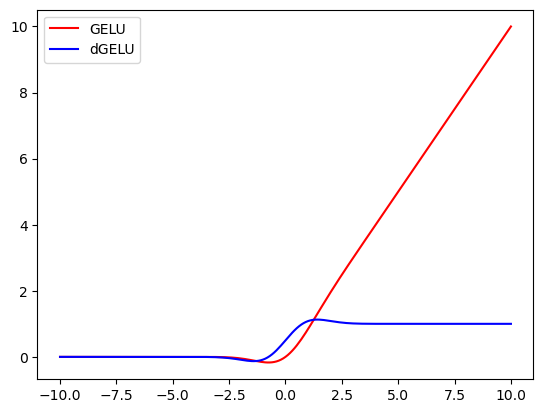

In [106]:
vals = GELU(space)
dvals = dGELU(space)
plt.plot(space, vals, label='GELU', color='r')
plt.plot(space, dvals, label='dGELU', color='b')
plt.legend()
plt.show()

## PReLU

$$
f(x)=max(\alpha x,x)
$$

$$
f'(x)= \begin{cases}
\alpha,x<0\\
1,x>0
  
\end{cases}
$$

In [110]:

def PReLU(x: np.ndarray, a=1) -> np.ndarray:
    return np.where(x > 0, x, a*x)

def dPReLU(x: np.ndarray, a=1) -> np.ndarray:
    return np.where(x > 0, 1, a)


In [111]:
print(f'{PReLU(input) = }')
print(f'{dPReLU(input) = }')

PReLU(input) = array([[[-5, -4, -3],
        [-2, -1,  0],
        [ 1,  2,  3]],

       [[ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]]])
dPReLU(input) = array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]])


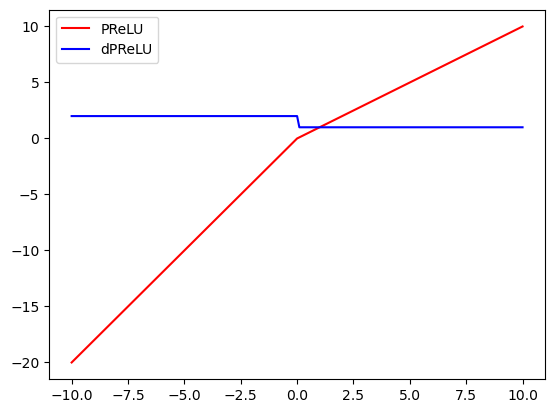

In [113]:
vals = PReLU(space, 2)
dvals = dPReLU(space, 2)
plt.plot(space, vals, label='PReLU', color='r')
plt.plot(space, dvals, label='dPReLU', color='b')
plt.legend()
plt.show()